Last edited by Clare Huang (July 29, 2018)

# How to read and process data in netCDF files as numpy arrays

In [1]:
import numpy as np # import numpy package to manipulate arrays and matrices
from netCDF4 import Dataset, num2date # This is to read .nc files and time marray
import matplotlib.pyplot as plt # import the graph plotting library
from math import pi

## Load the netCDF file with geopotential

The file can be downloaded using the script `download_40.5N_data.py`. After installing the `ecmwfapi` python package and obtaining the credentials to login the ECMWF server, you can download the data by running the script on command line:

```
python download_40.5N_data.py
```

In [2]:
fileobj = Dataset('1979-2016-300hPa-40.5N-z.nc', mode='r')

## Check what the file contains

In [3]:
fileobj

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2018-07-29 19:57:21 GMT by grib_to_netcdf-2.8.0: grib_to_netcdf /data/data04/scratch/68/fa/_mars-atls00-a562cefde8a29a7288fa0b8b7f9413f7-xEUvNd.grib -o /data/data03/scratch/bb/fb/_grib2netcdf-atls00-98f536083ae965b31b0d04811be6f4c6-y4mtOf.nc -utime
    dimensions(sizes): longitude(240), latitude(1), time(55524)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 z(time,latitude,longitude)
    groups: 

In [4]:
fileobj.variables['time']

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:0.0
    long_name: time
    calendar: gregorian
unlimited dimensions: time
current shape = (55524,)
filling off

In [5]:
# Get the dimensions
nlon = fileobj.variables['longitude'].size
ntime = fileobj.variables['time'].size

# Get longitude array
lon = fileobj.variables['longitude'][:]
# Get time array
tarray = num2date(fileobj.variables['time'][:],
                  units=fileobj.variables['time'].units,
                  calendar=fileobj.variables['time'].calendar)

print('Number of longitude grids: {}'.format(nlon))
print('Number of time steps: {}'.format(ntime))
print('First 5 elements of tarray: \n{}'.format(tarray[:5]))

Number of longitude grids: 240
Number of time steps: 55524
First 5 elements of tarray: 
[datetime.datetime(1979, 1, 1, 0, 0) datetime.datetime(1979, 1, 1, 6, 0)
 datetime.datetime(1979, 1, 1, 12, 0) datetime.datetime(1979, 1, 1, 18, 0)
 datetime.datetime(1979, 1, 2, 0, 0)]


# Get the time series of data at maybe 30 deg east

In [6]:
lon_loc = np.where(lon==30.0)[0][0]
print('Index of 30 deg E: {}'.format(lon_loc))

Index of 30 deg E: 20


In [7]:
tseries_for_30N = fileobj.variables['z'][:, 0, lon_loc]/9.81

# Visualize the time series

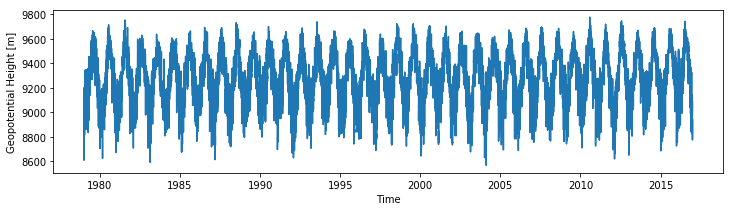

In [8]:
plt.figure(figsize=(12,3))
plt.plot(tarray, tseries_for_30N)
plt.xlabel('Time')
plt.ylabel('Geopotential Height [m]')
plt.show()